In [1]:
# Load the essential libraries and Ames dataset
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Ames = pd.read_csv("Ames.csv").select_dtypes(include=["int64", "float64"]).dropna(axis=1)
X = Ames.drop("SalePrice", axis=1)
y = Ames["SalePrice"]

# Initialize the Linear Regression model
model = LinearRegression()

# Prepare to collect feature scores
feature_scores = {}

# Evaluate each feature with cross-validation
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(model, X_single, y)
    feature_scores[feature] = cv_scores.mean()

# Identify the top 5 features based on mean CV R^2 scores
sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)
top_5 = sorted_features[0:5]

# Display the top 5 features and their individual performance
for feature, score in top_5:
    print(f"Feature: {feature}, Mean CV R^2: {score:.4f}")

Feature: OverallQual, Mean CV R^2: 0.6183
Feature: GrLivArea, Mean CV R^2: 0.5127
Feature: 1stFlrSF, Mean CV R^2: 0.3957
Feature: YearBuilt, Mean CV R^2: 0.2852
Feature: FullBath, Mean CV R^2: 0.2790


In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Ames = pd.read_csv("Ames.csv").select_dtypes(include=["int64", "float64"]).dropna(axis=1)
X = Ames.drop("SalePrice", axis=1)
y = Ames["SalePrice"]

# Evaluate each feature to find the top 5
model = LinearRegression()
feature_scores = {}

for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(model, X_single, y)
    feature_scores[feature] = cv_scores.mean()

sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)
top_5 = sorted_features[0:5]

# Extracting the top 5 features for our multiple linear regression
top_features = [feature for feature, score in top_5]

# Building the model with the top 5 features
X_top = Ames[top_features]

# Evaluating the model with cross-validation
cv_scores_mlr = cross_val_score(model, X_top, y, cv=5, scoring="r2")
mean_mlr_score = cv_scores_mlr.mean()
print(f"Mean CV R^2 Score for Multiple Linear Regression Model: {mean_mlr_score:.4f}")

Mean CV R^2 Score for Multiple Linear Regression Model: 0.8003


In [5]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

Ames = pd.read_csv("Ames.csv").select_dtypes(include=["int64", "float64"]).dropna(axis=1)
X = Ames.drop("SalePrice", axis=1)
y = Ames["SalePrice"]
model = LinearRegression()

# Perform Sequential Feature Selector with n=5
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()].to_list()
print(f"Features selected by SFS: {selected_features}")

scores = cross_val_score(model, Ames[selected_features], y)
print(f"Mean CV R^2 Score using SFS with n=5: {scores.mean():.4f}")

Features selected by SFS: ['GrLivArea', 'OverallQual', 'YearBuilt', '1stFlrSF', 'KitchenAbvGr']
Mean CV R^2 Score using SFS with n=5: 0.8056


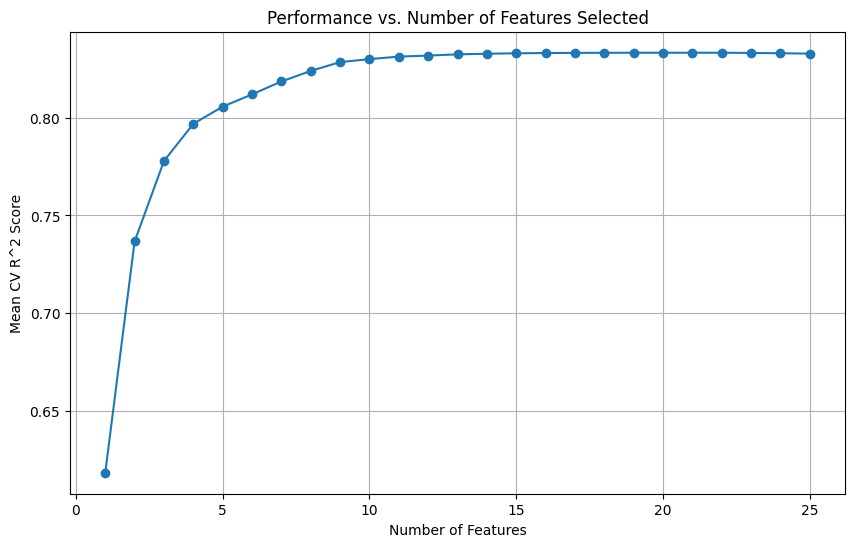

In [7]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

Ames = pd.read_csv("Ames.csv").select_dtypes(include=["int64", "float64"]).dropna(axis=1)
X = Ames.drop("SalePrice", axis=1)
y = Ames["SalePrice"]
model = LinearRegression()

# Prepare to store the mean CV R^2 scores for each number of features
mean_scores = []

# Performance of SFS from 1 feature to the maximum number of features available
for n_features_to_select in range(1, len(X.columns)):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features_to_select)
    sfs.fit(X, y)
    selected_features = X.columns[sfs.get_support()]
    score = cross_val_score(model, X[selected_features], y, cv=5, scoring="r2").mean()
    mean_scores.append(score)

# Plot the mean CV R^2 scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores, marker="o")
plt.title("Performance vs. Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R^2 Score")
plt.grid(True)
plt.show()

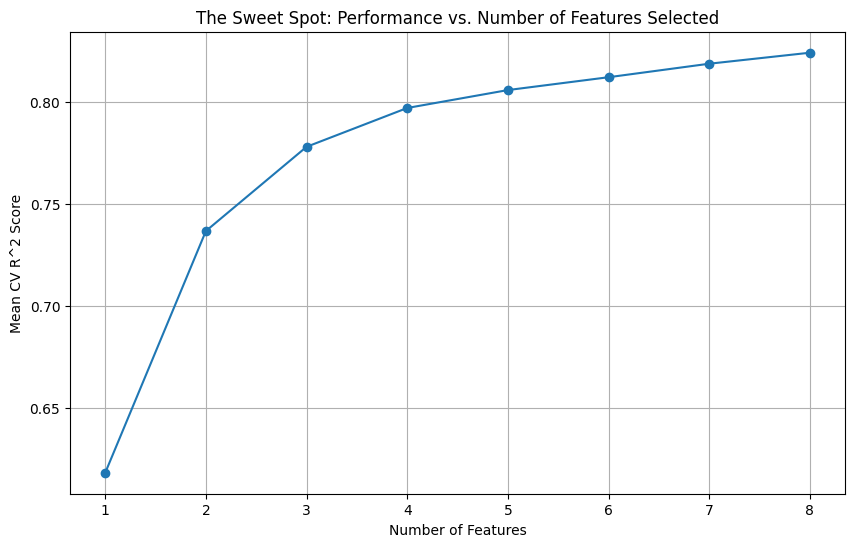

In [9]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

Ames = pd.read_csv("Ames.csv").select_dtypes(include=["int64", "float64"]).dropna(axis=1)
X = Ames.drop("SalePrice", axis=1)
y = Ames["SalePrice"]
model = LinearRegression()

# Apply Sequential Feature Selector with tolerance = 0.005
sfs_tol = SequentialFeatureSelector(model, n_features_to_select="auto", tol=0.005)
sfs_tol.fit(X, y)

# Get the number of features selected with tolerance
n_features_selected = sum(sfs_tol.get_support())

# Prepare to store the mean CV R^2 scores for each number of features
mean_scores_tol = []

# Iterate over a range from 1 feature to the Sweet Spot
for n_features_to_select in range(1, n_features_selected + 1):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features_to_select)
    sfs.fit(X, y)
    selected_features = X.columns[sfs.get_support()]
    score = cross_val_score(model, X[selected_features], y, cv=5, scoring="r2").mean()
    mean_scores_tol.append(score)

# Plot the mean CV R^2 scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol, marker="o")
plt.title("The Sweet Spot: Performance vs. Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R^2 Score")
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

Ames = pd.read_csv("Ames.csv").select_dtypes(include=["int64", "float64"]).dropna(axis=1)
X = Ames.drop("SalePrice", axis=1)
y = Ames["SalePrice"]
model = LinearRegression()

# Apply Sequential Feature Selector with tolerance = 0.005
sfs_tol = SequentialFeatureSelector(model, n_features_to_select="auto", tol=0.005)
sfs_tol.fit(X, y)

# Get the number of features selected with tolerance
n_features_selected = sum(sfs_tol.get_support())

# Prepare to store the mean CV R^2 scores for each number of features
mean_scores_tol = []

# Iterate over a range from 1 feature to the Sweet Spot
for n_features_to_select in range(1, n_features_selected + 1):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features_to_select)
    sfs.fit(X, y)
    selected_features = X.columns[sfs.get_support()]
    score = cross_val_score(model, X[selected_features], y, cv=5, scoring="r2").mean()
    mean_scores_tol.append(score)

# Print the selected features and their performance
selected_features = X.columns[sfs_tol.get_support()]
print(f"Number of features selected: {n_features_selected}")
print(f"Selected features: {selected_features.tolist()}")
print(f"Mean CV R^2 Score using SFS with tol=0.005: {mean_scores_tol[-1]:.4f}")

Number of features selected: 8
Selected features: ['GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', 'BedroomAbvGr', 'KitchenAbvGr']
Mean CV R^2 Score using SFS with tol=0.005: 0.8239
